In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

In [32]:
def get_df(optimizer: str, checkpoint_dir: str, string_lr: str) -> pd.DataFrame:
    """
    Reads in a DataFrame from a .csv file using the given optimizer, checkpoint directory,
    and learning rate.

    Parameters:
        optimizer:      The optimizer used to train the model that generated the .csv file
                        to be read in.
        checkpoint_dir: The checkpoint directory in which the .csv file resides.
        string_lr:      A string of the learning rate to splice into the name of the .csv file.
    """
    return pd.read_csv(
        os.path.join(
            checkpoint_dir,
            f'{optimizer}_{string_lr}_history.csv'
        )
    ).drop('Unnamed: 0', axis=1)

def get_histories(
    optimizer: str,
    checkpoint_dir: str = './checkpoint/'
) -> dict[float, pd.DataFrame]:
    """
    Retrieves all of the .csv files for a particular optimizer.

    Parameters:
        optimizer:      The optimizer that the models that generated the desired .csv
                        files were trained with.
        checkpoint_dir: The checkpoint directory in which the .csv files reside.
    """
    return {
        0.1     :   get_df(optimizer, checkpoint_dir, '0-1'),
        0.01    :   get_df(optimizer, checkpoint_dir, '0-01'),
        0.001   :   get_df(optimizer, checkpoint_dir, '0-001'),
        0.0001  :   get_df(optimizer, checkpoint_dir, '0-0001'),
    }

def best_epoch_data(history: pd.DataFrame, metric: str) -> tuple[int, float]:
    """
    Retrieves data from the best epoch for the particular metric in the test set.

    Parameters:
        history:    The DataFrame for which the best data is to be retrieved.
        metric:     The metric for which the best data is to be retrieved
    """
    if metric == 'Accuracy':
        idx = history.idxmax(axis=0)[f'Test {metric}']
    else:
        idx = history.idxmin(axis=0)[f'Test {metric}']
    return idx, history[f'Test {metric}'].loc[idx]

In [33]:
sgd_histories: dict[float, pd.DataFrame] = get_histories('SGD')
sgd_momentum_histories: dict[float, pd.DataFrame] = get_histories('SGD_momentum')
adam_histories: dict[float, pd.DataFrame] = get_histories('Adam')

In [42]:
def plot_learning_rate_comparisons(
    histories: dict[float, pd.DataFrame],
    metric: str,
    optimizer: str
) -> None:
    """
    Plots a figure with a comparison of the graphs of different learning rates for
    a particular metric with the provided optimizer.

    Parameters:
        histories:  The history DataFrames that are to be compared
        metric:     The metric that is being compared
        optimzier:  The optimizer that was used to train the models
    """
    fig: Figure; axs: np.ndarray
    fig, axs = plt.subplots(1, len(histories.keys()))
    fig.set_figwidth(6 * len(histories.keys()))
    fig.suptitle(
        f"Train and Test {metric} at Different Learning Rates with {optimizer} optimizer"
    )
    for i, lr in enumerate(histories.keys()):
        ax: Axes = axs[i]
        history = histories[lr]
        ax.plot(history.index, history[f'Train {metric}'], label=f'Train {metric}')
        ax.plot(history.index, history[f'Test {metric}'], label=f'Test {metric}')
        ax.set_title(f"Learning Rate {lr}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel(metric)
        ax.legend()

        best_idx: int; best_metric: float
        best_idx, best_metric = best_epoch_data(history, metric)
        if metric == 'Accuracy':
            best_metric_str = f'{best_metric * 100:.2f}%'
        else:
            best_metric_str = f'{best_metric:.2f}'
        ax.text(
            0.5,
            -0.2,
            f'Best Test {metric} achieved was {best_metric_str} at epoch {best_idx}',
            horizontalalignment='center',
            transform=ax.transAxes
        )
    plt.show()

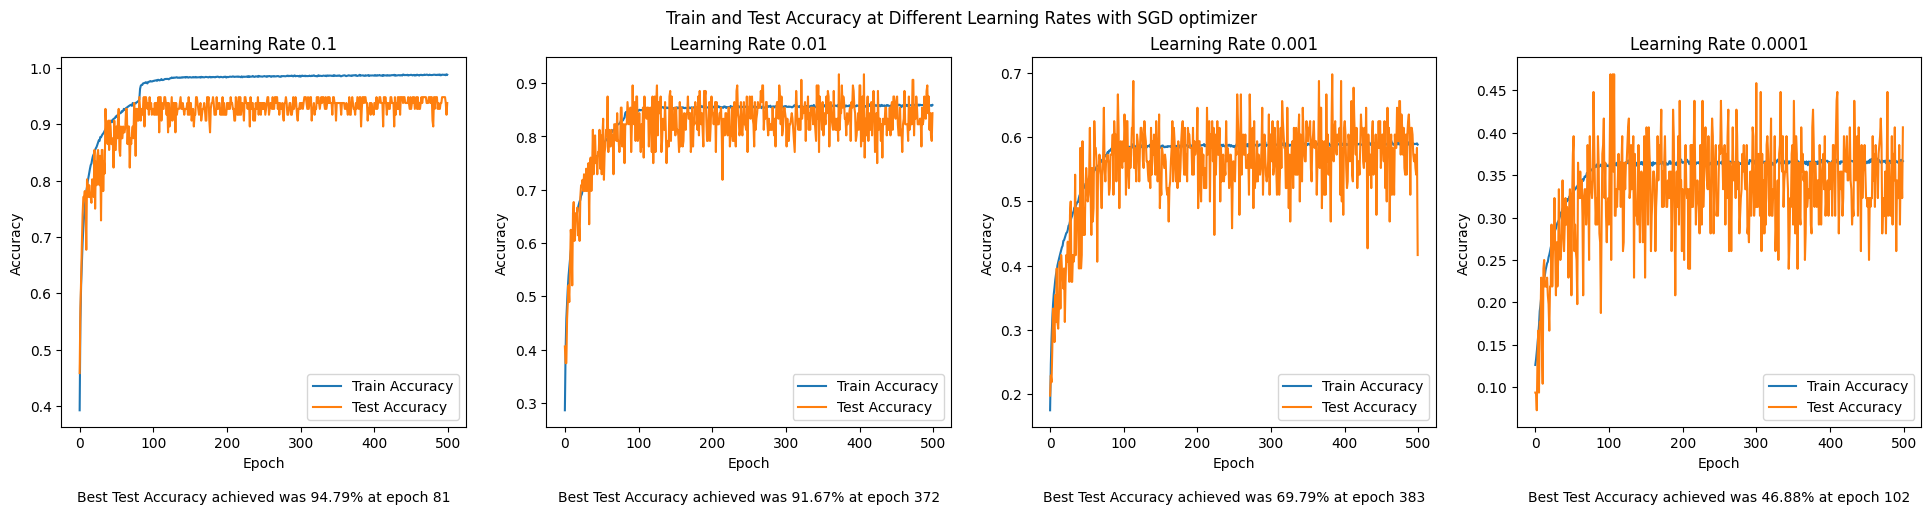

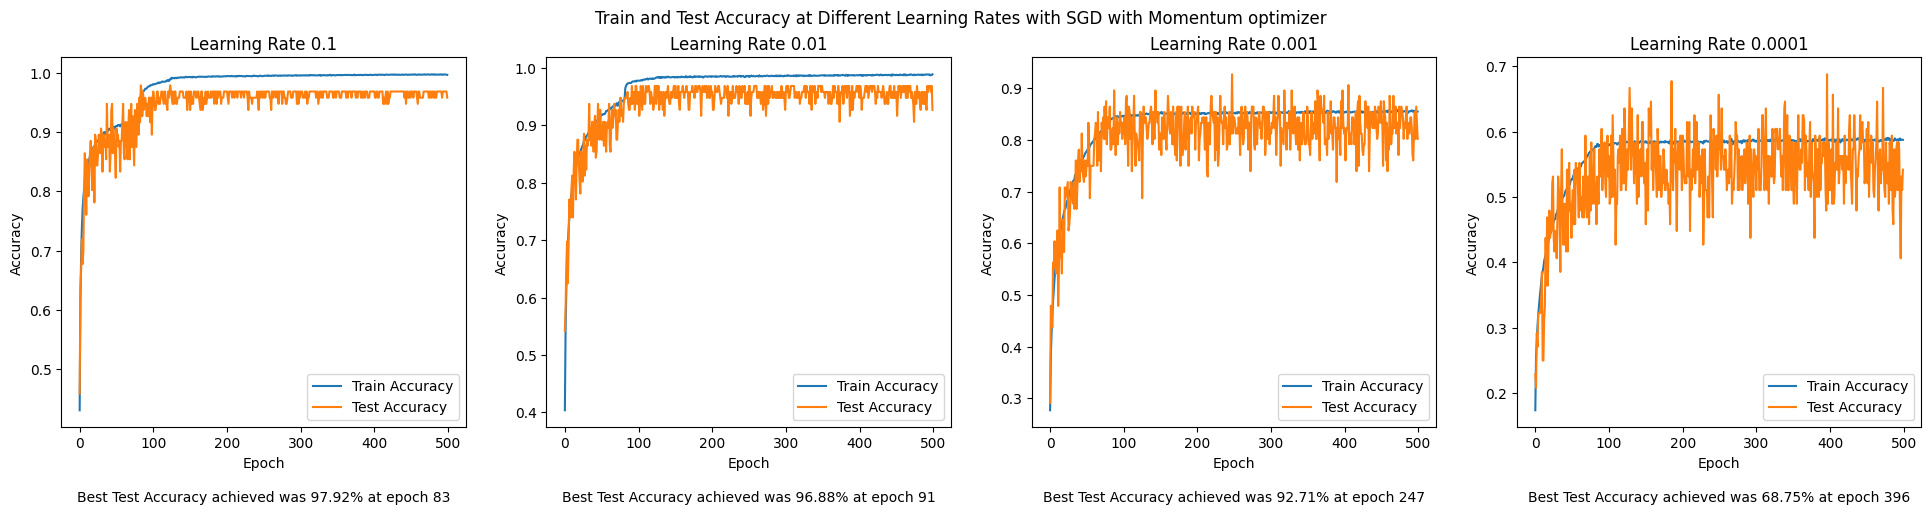

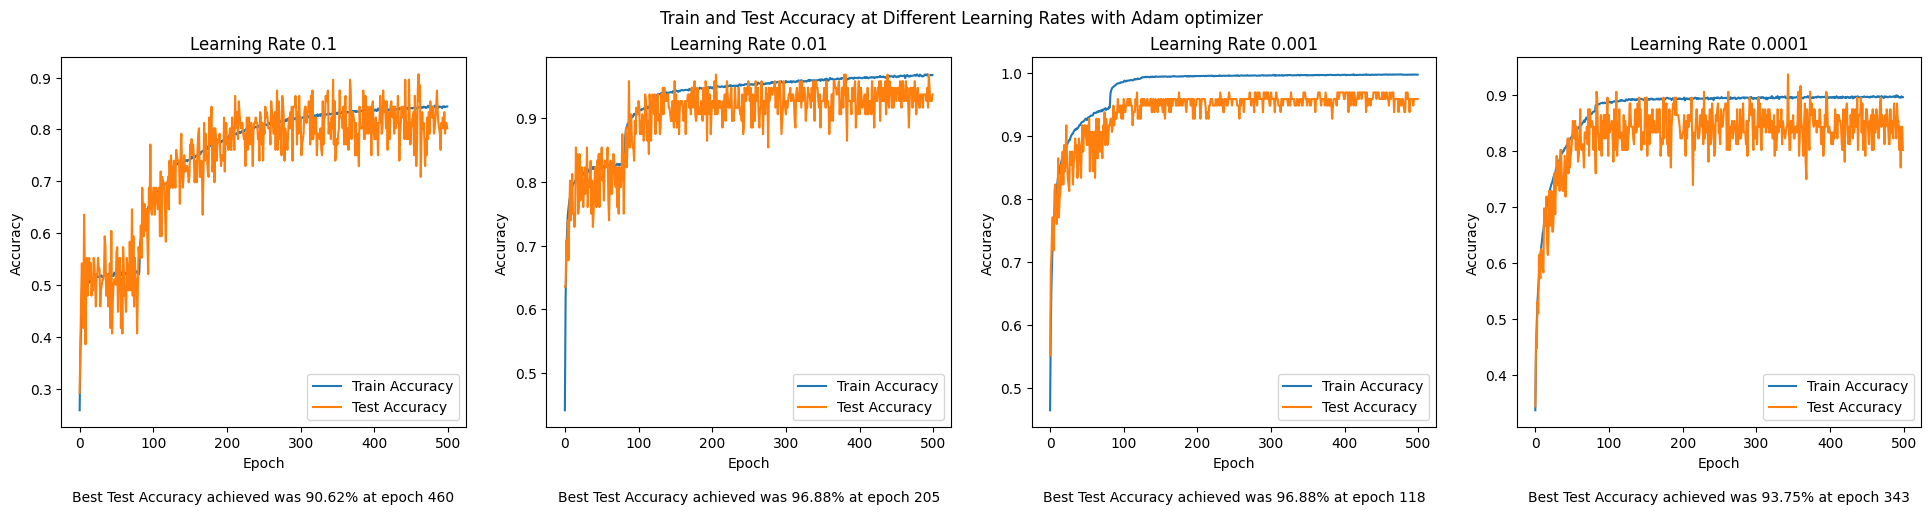

In [43]:
plot_learning_rate_comparisons(sgd_histories, 'Accuracy', 'SGD')
plot_learning_rate_comparisons(sgd_momentum_histories, 'Accuracy', 'SGD with Momentum')
plot_learning_rate_comparisons(adam_histories, 'Accuracy', 'Adam')

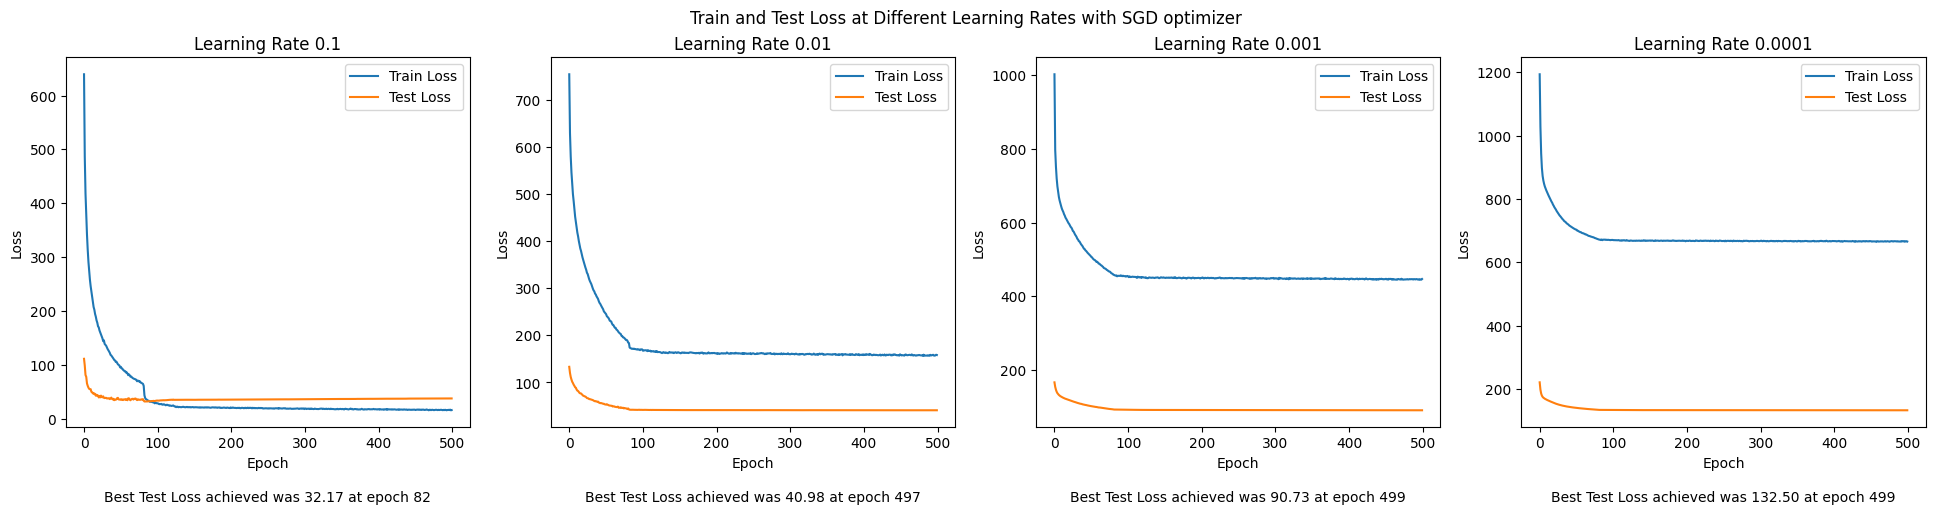

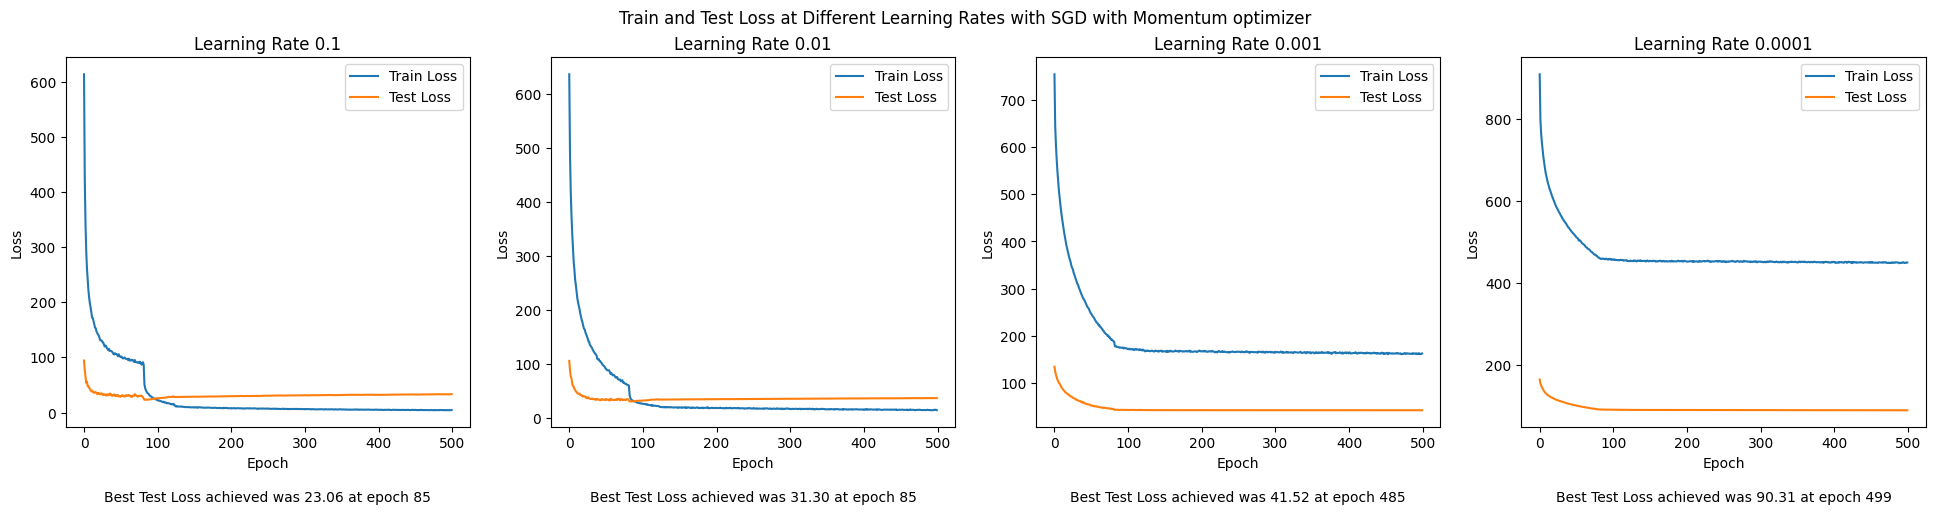

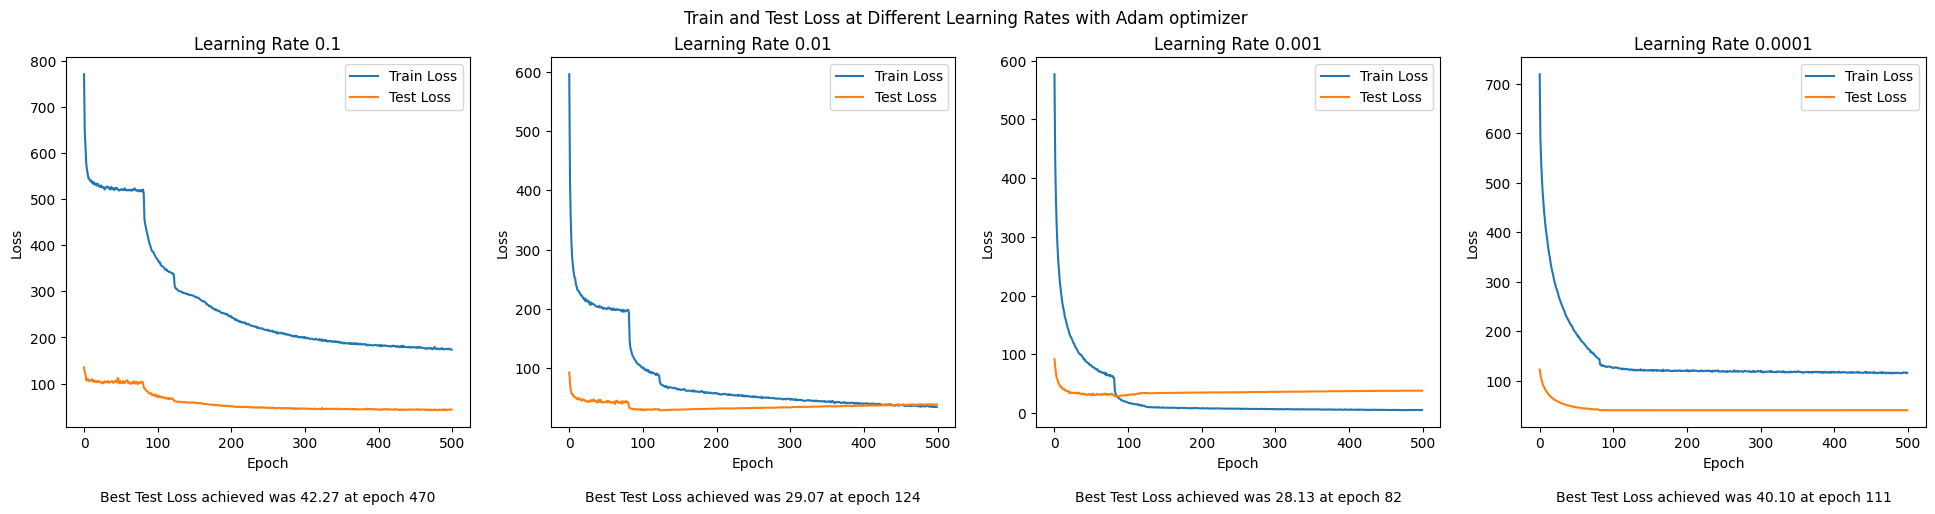

In [44]:
plot_learning_rate_comparisons(sgd_histories, 'Loss', 'SGD')
plot_learning_rate_comparisons(sgd_momentum_histories, 'Loss', 'SGD with Momentum')
plot_learning_rate_comparisons(adam_histories, 'Loss', 'Adam')